In [1]:
from __future__ import division
import os
import sys
import glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
%precision 4
plt.style.use('ggplot')

np.random.seed(1234)
import pymc3 as pm
import scipy.stats as stats

import logging
_logger = logging.getLogger("theano.gof.compilelock")
_logger.setLevel(logging.ERROR)

ERROR! Session/line number was not unique in database. History logging moved to new session 1623
Applied interval-transform to sigma_0 and added transformed sigma_0_interval to model.
Applied interval-transform to sigma_1 and added transformed sigma_1_interval to model.
Applied interval-transform to sigma_2 and added transformed sigma_2_interval to model.
Applied interval-transform to sigma_3 and added transformed sigma_3_interval to model.
Applied interval-transform to sigma_4 and added transformed sigma_4_interval to model.
Applied interval-transform to sigma_5 and added transformed sigma_5_interval to model.
Applied interval-transform to sigma_6 and added transformed sigma_6_interval to model.
CPU times: user 22.6 s, sys: 133 ms, total: 22.7 s
Wall time: 22.8 s
CPU times: user 2min 52s, sys: 1.2 s, total: 2min 53s
Wall time: 3min 50s
 [-----------------100%-----------------] 10000 of 10000 complete in 85.0 secCPU times: user 1min 24s, sys: 175 ms, total: 1min 24s
Wall time: 1min 24s

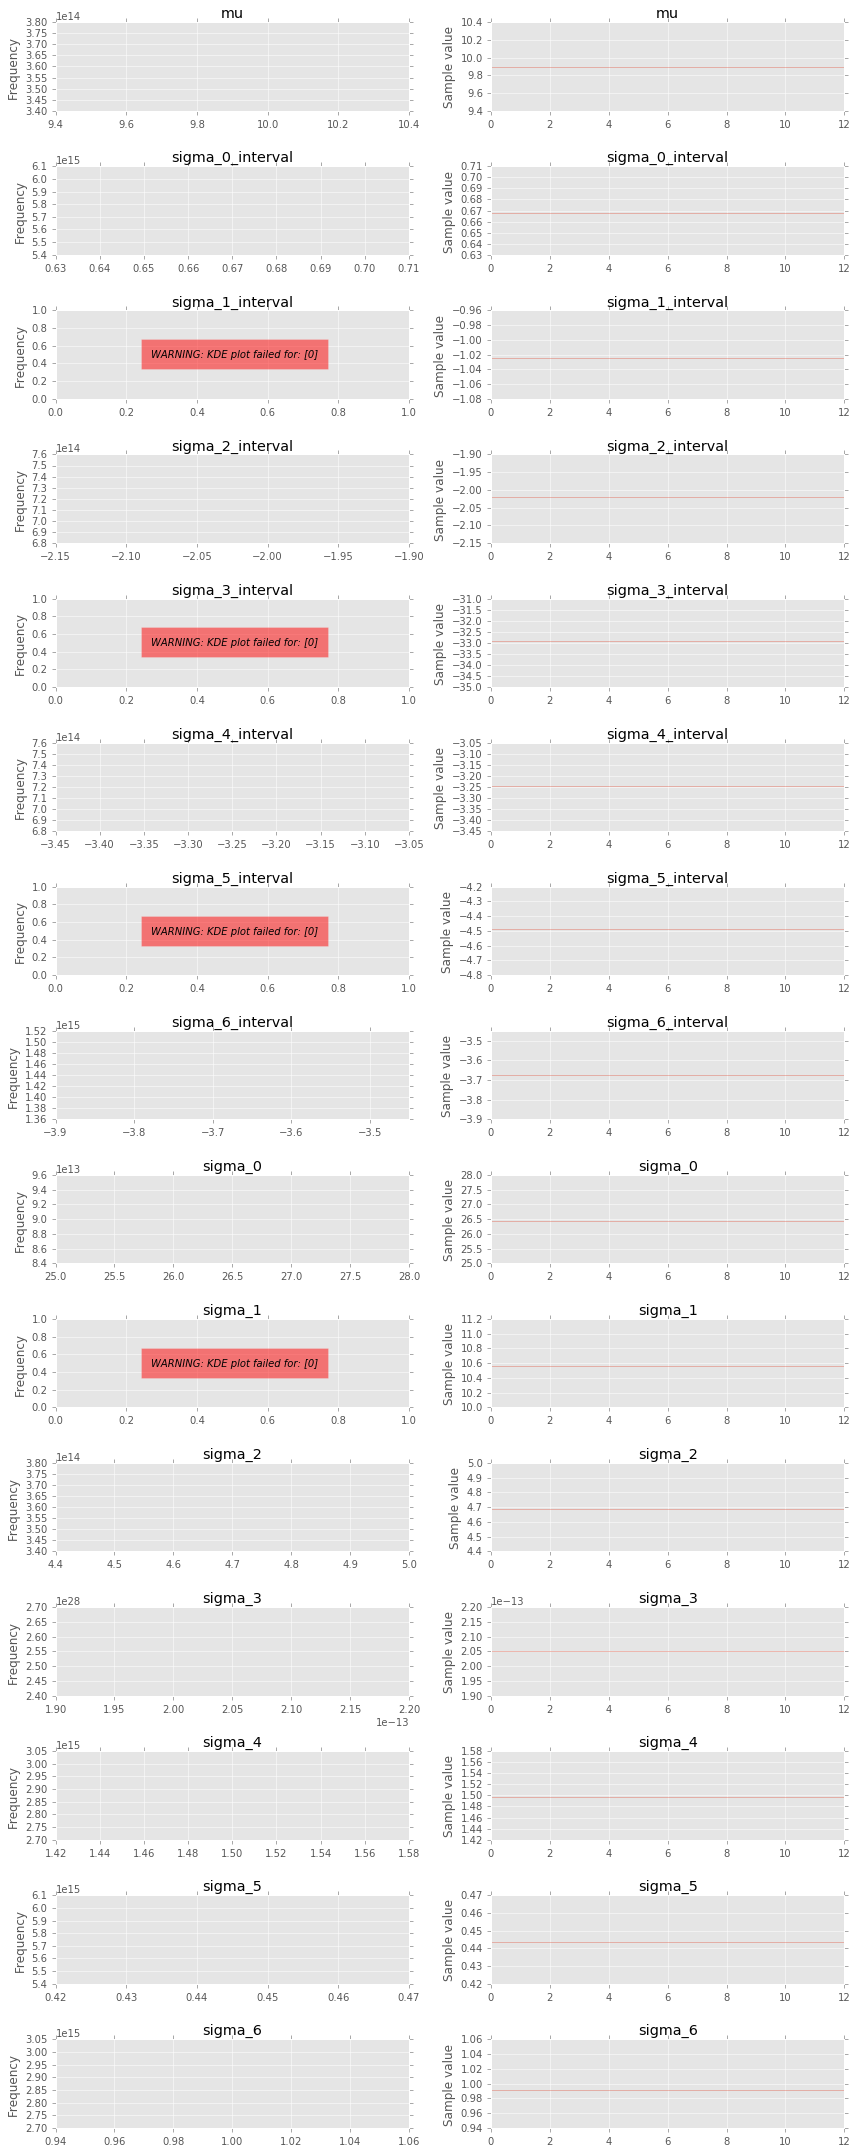

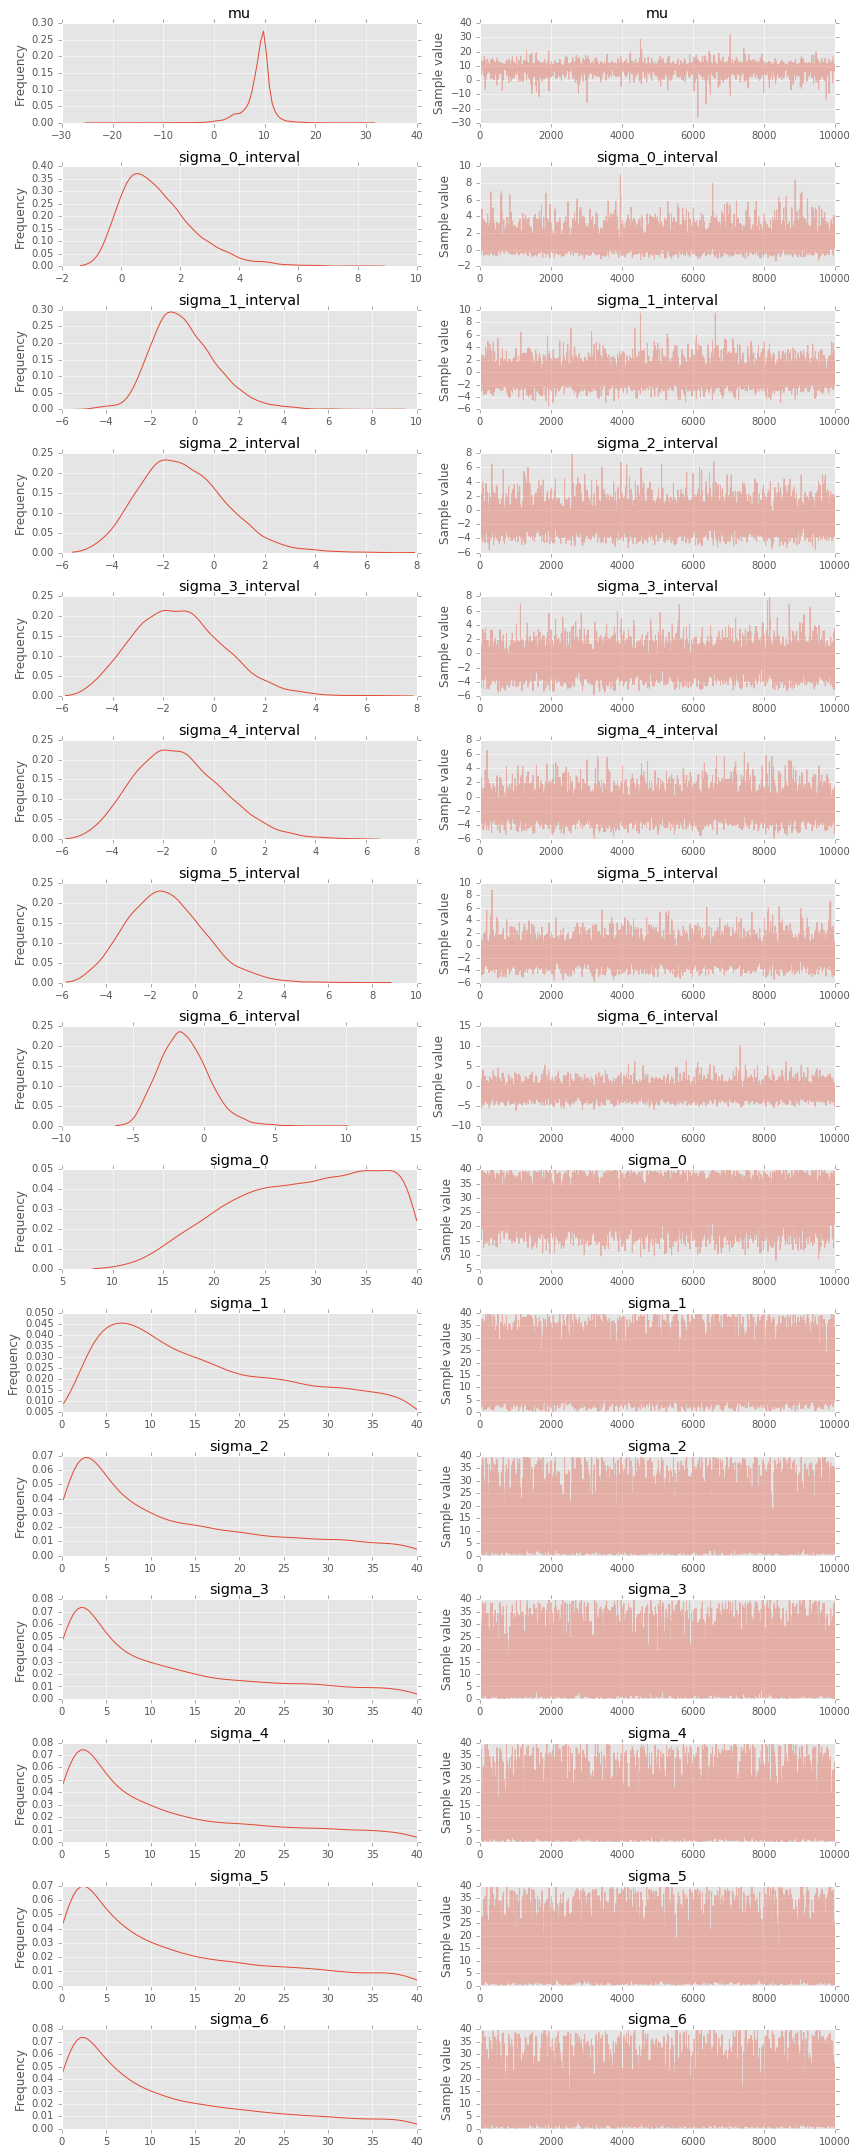

In [2]:
sample = [-27.020,3.570,8.191,9.898,9.603,9.945,10.056]
n = len(sample)

niter = 10000

with pm.Model() as model:
    mu = pm.Normal("mu", mu=0, sd=100)
    sigmas = [pm.Uniform("sigma_%d" % i, lower=0.01, upper=40) for i in range(n)]
    sample_d = [pm.Normal("sample_%d" % i, mu=mu, sd=sigmas[i], observed=sample[i]) for i in range(n)]
    
    %time start = pm.find_MAP()
    %time step = pm.NUTS() # Hamiltonian MCMC with No U-Turn Sampler
    %time trace = pm.sample(niter, step, start, random_seed=123, progressbar=True)